# **Extract data through Google API**

In [1]:
import os
import sys

# src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
# if src_path not in sys.path:
#     sys.path.insert(0, src_path)

from call_ListGauges import get_ListGauges
from call_GetGaugeModel import get_GetGaugeModel
from call_QueryGaugeForecasts import get_QueryGaugeForecasts
from export import export_country_gauge_coords
from export import extract_country_data_for_time_delta
from plots import get_custom_palette
from plots import set_plot_style
from plots import map_gauge_coordinates_of_country
from plots import plot_danger_levels_hist
from plots import plot_gauge_forecast_for_issue_time
from plots import plot_week_of_gauge_forecast_for_issue_time
from plots import plot_x_days_of_gauge_forecast_for_issue_time

In [2]:
from typing import List, Dict, Tuple, Any
import json
import pandas as pd
import geopandas as gpd
from shapely import geometry
import requests
import pprint
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Delete dependencies later, keep them for now for experminetation

**Use the API Yes/No**

In [18]:
# Global variable, set to True if you want to query the API
QUERY = bool(1)

### **Goal:**

Make main() that takes as argument a country and generates a few .csv files with all data for all gauges in that country


##### **Steps**:
To get the data from the Google Bucket into workable format, we follow:
* Connect with the API
* **Expand this step!** Set-up pipeline which downloads all relevant data per country code
* Format the data into DateTime (y) and features (x)
* Store externally as .csv

##### **Background info -- API**
The API has three basic functions:
* *ListGauges*: Returns a list of supported gauges within a given country (code)
* *GetGaugeModel*: Returns model information of a specific gauge (within a given country, that is)
* *QueryGaugeForecasts*: Returns the forecasts of specific gauge

We'll create a pipeline going through these three functions, taking as input just the target country and outputting a DateTime-indexed .csv with all available forecasts for that country's available gauges. 

##### **(??? -> Maybe this is too much... A format which uses a list of matrices (an implicit tensor) where the matrices are just one gauge might be better. Either way, the metadata is best stored separately in a separate .csv. Choose adequate naming here.)**

For subsequent analysis, see ../analyse_data/

In [4]:
# Note: add this folder manually at the pointed path for the script to run
# For the key, ask the owner of the repository or try guessing
path_API_key = "../../data/keys/API_key.txt"

#### **Executing ListGauges command**

In [5]:
# # # if QUERY:
# # #     df_gauges_ML = get_ListGauges('Mali', path_API_key)
# # #     df_gauges_ML.to_csv(
# # #         "../../data/processed/metadata/metadata_gauges_Mali.csv",
# # #         index = False,
# # #         decimal = '.',
# # #         sep = ';',
# # #         encoding = 'utf-8'
# # #     )
# # # else:
# # #     df_gauges_ML = pd.read_csv(
# # #         "../../data/processed/metadata/metadata_gauges_Mali.csv",
# # #         sep = ';',
# # #         decimal = '.',
# # #         encoding = 'utf-8'
# # #     )

# # if QUERY:
# #     df_gauges_Kenya = get_ListGauges('Kenya', path_API_key)
# #     df_gauges_Kenya.to_csv(
# #         "../../data/processed/metadata/metadata_gauges_Kenya.csv",
# #         index = False,
# #         decimal = '.',
# #         sep = ';',
# #         encoding = 'utf-8'
# #     )
# # else:
# #     df_gauges_Kenya = pd.read_csv(
# #         "../../data/processed/metadata/metadata_gauges_Kenya.csv",
# #         sep = ';',
# #         decimal = '.',
# #         encoding = 'utf-8'
# #     )

# if QUERY:
#     df_gauges_Zambia = get_ListGauges('Zambia', path_API_key)
#     df_gauges_Zambia.to_csv(
#         "../../data/processed/metadata/metadata_gauges_Zambia.csv",
#         index = False,
#         decimal = '.',
#         sep = ';',
#         encoding = 'utf-8'
#     )
# else:
#     df_gauges_Kenya = pd.read_csv(
#         "../../data/processed/metadata/metadata_gauges_Zambia.csv",
#         sep = ';',
#         decimal = '.',
#         encoding = 'utf-8'
#     )

In [16]:
# As per 07/10/24, the Mali data starts at 08/07/24
a = datetime.datetime.now() - datetime.timedelta(days = 91)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_gauges_Mali, df_gauge_models_Mali, df_forecasts_Mali = \
        extract_country_data_for_time_delta(
            path_API_key,
            (a, b),
            'Mali',
            True # Do not export data to .csv files for now
    )

2024-07-08 2024-10-08 92 days, 0:00:00


In [17]:
# As per 07/10/24, the Mali data starts at 10/07/24
a = datetime.datetime.now() - datetime.timedelta(days = 89)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_gauges_Kenya, df_gauge_models_Kenya, df_forecasts_Kenya = \
        extract_country_data_for_time_delta(
            path_API_key,
            (a, b),
            'Kenya',
            True # Do not export data to .csv files for now
    )

2024-07-08 2024-10-08 92 days, 0:00:00


In [21]:
# As per 07/10/24, the Zambia data starts at 08/07/24
a = datetime.datetime.now() - datetime.timedelta(days = 91)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_gauges_Zambia, df_gauge_models_Zambia, df_forecasts_Zambia = \
        extract_country_data_for_time_delta(
            path_API_key,
            (a, b),
            'Zambia',
            True # Do not export data to .csv files for now
    )

2024-07-08 2024-10-08 92 days, 0:00:00


Exception: Error: 502 -- <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 502 (Server Error)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) 0}}@media only screen and (-webkit-min-device-pixel-ratio:2){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat;-webkit-background-size:100% 100%}}#logo{display:inline-block;height:54px;width:150px}
  </style>
  <a href=//www.google.com/><span id=logo aria-label=Google></span></a>
  <p><b>502.</b> <ins>That’s an error.</ins>
  <p>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.  <ins>That’s all we know.</ins>


In [9]:
print(df_gauges_Mali.head(2))
print(df_gauge_models_Mali.head(2))
print(df_forecasts_Mali.head(2))
print(len(df_gauges_Mali), len(df_gauge_models_Mali), len(df_forecasts_Mali))

  siteName source river           gaugeId  qualityVerified   latitude  \
0           HYBAS        hybas_1120705070             True  12.835417   
1           HYBAS        hybas_1121893090             True  14.131250   

   longitude  
0  -7.581250  
1  -5.039583  
            gaugeId           gaugeValueUnit  qualityVerified  dangerLevel  \
0  hybas_1121893090  CUBIC_METERS_PER_SECOND             True  2800.095459   
1  hybas_1120689830  CUBIC_METERS_PER_SECOND             True  4076.936035   

   extremeDangerLevel  warningLevel  
0         3149.558838   2487.176758  
1         4501.068359   3632.668457  
           gauge_ID  issue_date                       issue_time    fc_date  \
0  hybas_1120641660  2024-09-27 2024-09-27 13:55:47.279768+00:00 2024-09-26   
1  hybas_1120641660  2024-09-27 2024-09-27 13:55:47.279768+00:00 2024-09-27   

      fc_value  
0  2928.896240  
1  2982.024902  
16 16 1408


In [10]:
print(df_gauges_Mali.columns)
print(df_gauge_models_Mali.columns)
print(df_forecasts_Mali.columns)

Index(['siteName', 'source', 'river', 'gaugeId', 'qualityVerified', 'latitude',
       'longitude'],
      dtype='object')
Index(['gaugeId', 'gaugeValueUnit', 'qualityVerified', 'dangerLevel',
       'extremeDangerLevel', 'warningLevel'],
      dtype='object')
Index(['gauge_ID', 'issue_date', 'issue_time', 'fc_date', 'fc_value'], dtype='object')


In [37]:
export_country_gauge_coords(df_gauges_Mali, True, 'Mali')

Coordinates of gauges in Mali
                   latitude  longitude
gaugeId                               
hybas_1120661040  13.985417  -7.152083
hybas_1120739110  11.977083  -6.360417
hybas_1120737100  12.018750  -8.322917
hybas_1120679780  13.493750  -6.202083
hybas_1121900350  13.685417  -5.893750
hybas_1121890140  14.314583  -4.422917
hybas_1120758950  11.427083  -6.581250
hybas_1120641660  14.506250  -4.206250
hybas_1121893090  14.131250  -5.039583
hybas_1120650110  14.277083  -6.927083
hybas_1121919510  12.410417  -8.106250
hybas_1120705070  12.835417  -7.581250
hybas_1120689830  13.210417  -7.077083
hybas_1121905290  13.360417  -6.789583
hybas_1121895840  13.956250  -5.360417
hybas_1120766460  11.222917  -8.485417


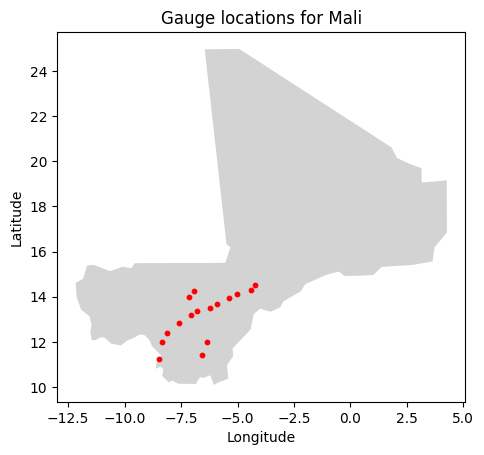

In [11]:
map_gauge_coordinates_of_country(df_gauges_Mali, 'Mali')

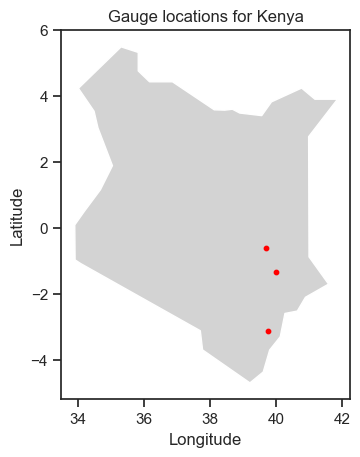

In [61]:
map_gauge_coordinates_of_country(df_gauges_Kenya, 'Kenya')

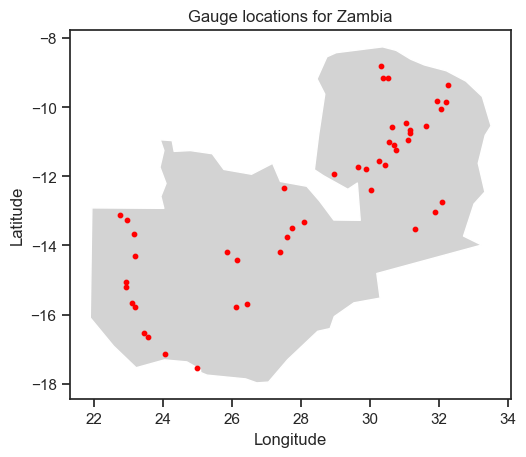

In [73]:
map_gauge_coordinates_of_country(df_gauges_Zambia, 'Zambia')

#### **Executing GetGaugeModel command**

In [41]:
# # # if QUERY:
# # #     df_gauge_models_ML = get_GetGaugeModel(path_API_key, df_gauges_Mali)
# # #     df_gauge_models_ML.to_csv(
# # #         f"../../data/processed/gauge_metadata_per_country/gauge_meta_Mali.csv",
# # #         index = False,
# # #         sep = ';',
# # #         decimal = '.',
# # #         encoding = 'utf-8'
# # #     )  
# # # else :
# # #     df_gauge_models_ML = pd.read_csv(
# # #         "../../data/processed/gauge_metadata_per_country/gauge_meta_Mali.csv",
# # #         sep = ';',
# # #         decimal = '.',
# # #         encoding = 'utf-8'
# # #     )

# # if QUERY:
# #     df_gauge_models_Kenya = get_GetGaugeModel(path_API_key, df_gauges_Kenya)
# #     df_gauge_models_Kenya.to_csv(
# #         f"../../data/processed/gauge_metadata_per_country/gauge_meta_Kenya.csv",
# #         index = False,
# #         sep = ';',
# #         decimal = '.',
# #         encoding = 'utf-8'
# #     )  
# # else :
# #     df_gauge_models_Kenya = pd.read_csv(
# #         "../../data/processed/gauge_metadata_per_country/gauge_meta_Kenya.csv",
# #         sep = ';',
# #         decimal = '.',
# #         encoding = 'utf-8'
# #     )

# if QUERY:
#     df_gauge_models_Zambia = get_GetGaugeModel(path_API_key, df_gauges_Zambia)
#     df_gauge_models_Zambia.to_csv(
#         f"../../data/processed/gauge_metadata_per_country/gauge_meta_Zambia.csv",
#         index = False,
#         sep = ';',
#         decimal = '.',
#         encoding = 'utf-8'
#     )  
# else :
#     df_gauge_models_Zambia = pd.read_csv(
#         "../../data/processed/gauge_metadata_per_country/gauge_meta_Zambia.csv",
#         sep = ';',
#         decimal = '.',
#         encoding = 'utf-8'
#     )

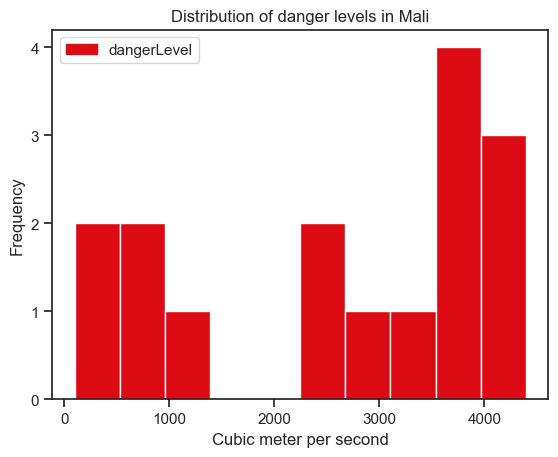

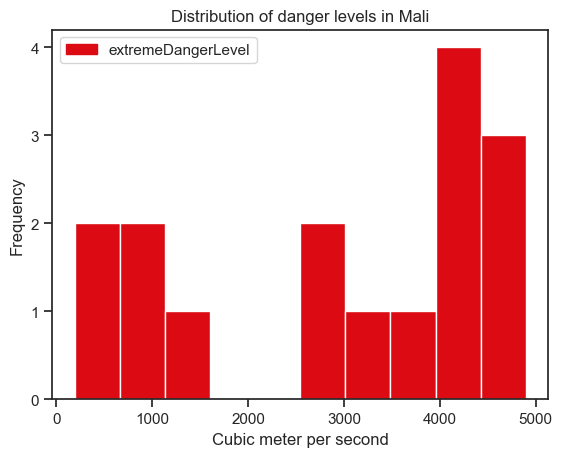

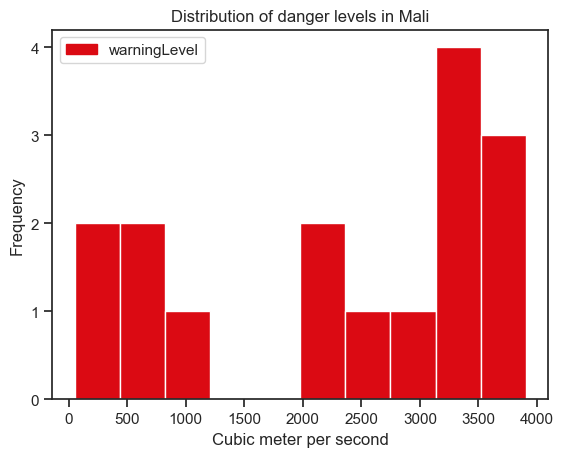

In [12]:
plot_danger_levels_hist(df_gauge_models_Mali, 'Mali')

#### **Executing QueryGaugeForecast command**

In [13]:
last_week = datetime.datetime.now() - datetime.timedelta(days = 7)
tomorrow = datetime.datetime.now() + datetime.timedelta(days = 1)

print(last_week)
print(tomorrow)

df_gauges_Mali['gaugeId'].tolist()[0]

print(type(last_week))
print(str(last_week)[:10])

2024-09-30 11:03:16.950027
2024-10-08 11:03:16.950606
<class 'datetime.datetime'>
2024-09-30


In [14]:
QUERY

True

In [47]:
a = datetime.datetime.now() - datetime.timedelta(days = 91)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_forecasts_ML = get_QueryGaugeForecasts(
        path_API_key, df_gauges_Mali['gaugeId'].tolist(), (a, b)
    )
    df_forecasts_ML.to_csv(
        f"../../data/floods-data/mali/{str(a)[:10]}_to_{str(b)[:10]}.csv",
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
)

2024-07-08 2024-10-08 92 days, 0:00:00


In [70]:
a = datetime.datetime.now() - datetime.timedelta(days = 100)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_forecasts_Kenya = get_QueryGaugeForecasts(
        path_API_key, df_gauges_Kenya['gaugeId'].tolist(), (a, b)
    )
    # df_forecasts_Kenya.to_csv(
    #     f"../../data/floods-data/mali/{str(a)[:10]}_to_{str(b)[:10]}.csv",
    #     sep = ';',
    #     decimal = '.',
    #     encoding = 'utf-8'
# )

SyntaxError: unmatched ')' (1531532176.py, line 14)

In [78]:
a = datetime.datetime.now() - datetime.timedelta(days = 95)
b = datetime.datetime.now() + datetime.timedelta(days = 1)
print(a.date(), b.date(), b.date() - a.date())

if QUERY:
    df_forecasts_Zambia = get_QueryGaugeForecasts(
        path_API_key, df_gauges_Zambia['gaugeId'].tolist(), (a, b)
    )
    # df_forecasts_Zambia.to_csv(
    #     f"../../data/floods-data/mali/{str(a)[:10]}_to_{str(b)[:10]}.csv",
    #     sep = ';',
    #     decimal = '.',
    #     encoding = 'utf-8'
# )

2024-07-04 2024-10-08 96 days, 0:00:00


In [79]:
df_forecasts_Zambia

,gauge_ID,issue_date,issue_time,fc_date,fc_value
0,hybas_1121423970,2024-07-08,2024-07-08 13:58:43.540238+00:00,2024-07-07,334.776031
1,hybas_1121423970,2024-07-08,2024-07-08 13:58:43.540238+00:00,2024-07-08,334.618164
2,hybas_1121423970,2024-07-08,2024-07-08 13:58:43.540238+00:00,2024-07-09,332.287476
3,hybas_1121423970,2024-07-08,2024-07-08 13:58:43.540238+00:00,2024-07-10,328.867493
4,hybas_1121423970,2024-07-08,2024-07-08 13:58:43.540238+00:00,2024-07-11,326.848267
...,...,...,...,...,...
33851,hybas_1121435410,2024-10-07,2024-10-07 08:21:38.739222+00:00,2024-10-09,210.711731
33852,hybas_1121435410,2024-10-07,2024-10-07 08:21:38.739222+00:00,2024-10-10,210.492935
33853,hybas_1121435410,2024-10-07,2024-10-07 08:21:38.739222+00:00,2024-10-11,209.691818
33854,hybas_1121435410,2024-10-07,2024-10-07 08:21:38.739222+00:00,2024-10-12,208.784363


In [71]:
df_forecasts_Kenya

,gauge_ID,issue_date,issue_time,fc_date,fc_value
0,hybas_1122094130,2024-07-10,2024-07-10 13:47:13.848429+00:00,2024-07-09,27.185442
1,hybas_1122094130,2024-07-10,2024-07-10 13:47:13.848429+00:00,2024-07-10,29.338598
2,hybas_1122094130,2024-07-10,2024-07-10 13:47:13.848429+00:00,2024-07-11,28.901773
3,hybas_1122094130,2024-07-10,2024-07-10 13:47:13.848429+00:00,2024-07-12,28.660864
4,hybas_1122094130,2024-07-10,2024-07-10 13:47:13.848429+00:00,2024-07-13,28.531595
...,...,...,...,...,...
2163,hybas_1122087880,2024-10-07,2024-10-07 07:56:13.006947+00:00,2024-10-09,28.942570
2164,hybas_1122087880,2024-10-07,2024-10-07 07:56:13.006947+00:00,2024-10-10,28.629852
2165,hybas_1122087880,2024-10-07,2024-10-07 07:56:13.006947+00:00,2024-10-11,28.137909
2166,hybas_1122087880,2024-10-07,2024-10-07 07:56:13.006947+00:00,2024-10-12,28.016115


In [48]:
df_forecasts_ML = pd.read_csv(
    "../../data/floods-data/mali/2024-07-08_to_2024-10-08.csv",
    index_col = 0,
    sep = ';',
    decimal = '.',
    encoding = 'utf-8'
)

In [49]:
print(df_forecasts_ML.columns)
print(len(df_forecasts_ML))
print(df_forecasts_ML.head(2))

Index(['gauge_ID', 'issue_date', 'issue_time', 'fc_date', 'fc_value'], dtype='object')
11776
           gauge_ID  issue_date                        issue_time     fc_date  \
0  hybas_1120641660  2024-07-08  2024-07-08 13:54:03.433896+00:00  2024-07-07   
1  hybas_1120641660  2024-07-08  2024-07-08 13:54:03.433896+00:00  2024-07-08   

     fc_value  
0  238.515350  
1  247.505783  


In [50]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 10)

plot_gauge_forecast_for_issue_time(
    df_forecasts_ML, df_gauges_ML['gaugeId'].tolist()[0], start_date, 'Mali'
)

NameError: name 'plot_gauge_forecast_for_issue_time' is not defined

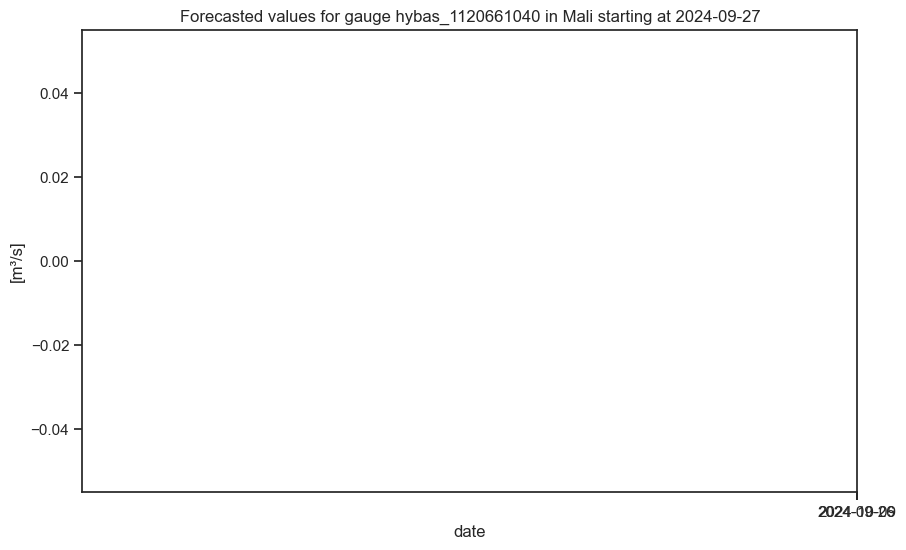

In [116]:
plot_week_of_gauge_forecast_for_issue_time(
    df_forecasts_ML, df_gauges_ML['gaugeId'].tolist()[0], start_date, 'Mali'
)

In [56]:
# def make_subset_for_gauge_and_issue_time(
#         df: pd.DataFrame, gauge: str, issue_date: datetime.datetime) -> pd.DataFrame:
#     """
#     Create a subset of a DataFrame for a specific gauge and issue time

#     :param df: DataFrame with forecasted values
#     :param gauge: ID of the gauge
#     :param issue_time: issue time of the forecast
#     :return: subset of the DataFrame
#     """
#     if not all(df['gauge_ID'].apply(lambda x: isinstance(x, str))):
#         df['gauge_ID'] = df['gauge_ID'].astype(str)
#     if not all(df['issue_date'].apply(lambda x: isinstance(x, datetime.date))):
#         df['issue_date'] = pd.to_datetime(df['issue_date']).dt.date
#     assert all(df['gauge_ID'].apply(lambda x: isinstance(x, str))), \
#         "gauge_ID column contains non-string values, subseting hindered"
#     assert all(df['issue_date'].apply(lambda x: isinstance(x, datetime.date))), \
#         "issue_date column contains non-date values, subsetting hindered"

#     return df[(df['gauge_ID'] == gauge) & (df['issue_date'] == issue_date.date())]  


# def create_dates_series(start_date : datetime.datetime, delta: int) -> pd.Series:
#     """
#     Create a series of dates starting from a given date and going on for a given number of days

#     :param start_date: starting date
#     :param delta: number of days
#     :return: Series of dates
#     """
#     return pd.Series(
#         # minus one here because, strangely enough, the first forecasted
#         # date is one day in the past compared to the issue date...
#         [start_date.date() + datetime.timedelta(days = idx - 1) for idx in range(0, delta + 1)]
#     )


# def set_custom_date_ticks(ax: plt.Axes, dates: pd.Series) -> None:
#     """
#     Set custom date ticks on the x-axis of a plot, where only
#     the first and final date are displayed, while keeping the ticks

#     :param ax: Axes object
#     :param dates: Series of dates (datetime.date objects)
#     """
#     ax.set_xticks(dates)
#     x_labels = [
#         dates.iloc[0].strftime('%Y-%m-%d')
#     ] + [''] * (len(dates) - 2) + [
#         dates.iloc[-1].strftime('%Y-%m-%d')
#     ]
#     ax.set_xticklabels(x_labels)  


# def plot_gauge_forecast_for_issue_time(
#         df : pd.DataFrame, gauge: str, issue_date : datetime.datetime, country : str = None) -> None:
#     """
#     Plots with a graph the forecasted values for a specific gauge and issue time

#     :param df: DataFrame with forecasted values
#     :param gauge: ID of the gauge
#     :param issue_time: issue time of the forecast
#     :param country: name of the country
#     """
#     set_plot_style()

#     df_subset = make_subset_for_gauge_and_issue_time(df, gauge, issue_date)
#     if df_subset.empty:
#         print(f"No forecasted values for gauge {gauge} at {issue_date.date()}")
#         return

#     ax = sns.lineplot(
#         x = 'fc_date',
#         y = 'fc_value',
#         data = df_subset,
#         color = '#DB0A13'
#     )

#     # only display first and final forecast date on date-axis while keeping ticks
#     set_custom_date_ticks(
#         ax,
#         create_dates_series(issue_date, 7)
#     )

#     plt.title(f'Forecasts for gauge {gauge} in {country}, w/ 1st issue date: {issue_date.date()}')
#     plt.xlabel('date')
#     plt.ylabel('[m³/s]')
#     plt.show()

2024-09-27 11:51:05.109411
0    2024-09-26
1    2024-09-27
2    2024-09-28
3    2024-09-29
4    2024-09-30
5    2024-10-01
6    2024-10-02
7    2024-10-03
dtype: object


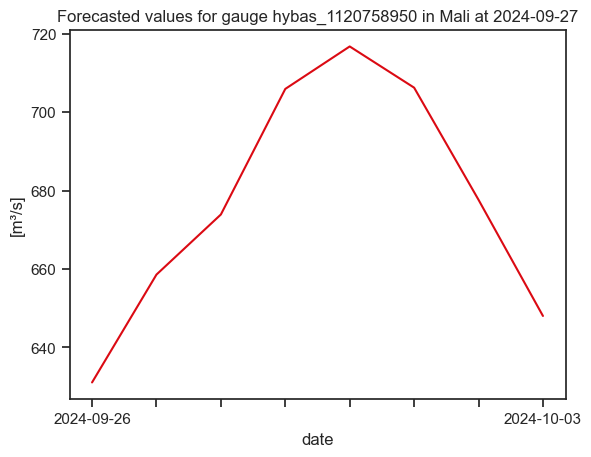

In [55]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 10)
print(start_date)
plot_gauge_forecast_for_issue_time(
    df_forecasts_Mali,
    df_gauges_Mali['gaugeId'].tolist()[0],
    start_date,
    'Mali'
)

In [66]:
# def plot_week_of_gauge_forecast_for_issue_time(
#         df : pd.DataFrame, gauge: str, issue_date : datetime.datetime, country : str = None) -> None:
#     """
#     Plots the forecasted values for a specific gauge over a week of
#     issue times, giving seven graphs in total, each of (7 + 1 =) 8 days length 

#     :param df: DataFrame with forecasted values
#     :param gauge: ID of the gauge
#     :param issue_time: first issue time
#     :param country: Name of the country
#     """
#     set_plot_style()
#     plt.figure(figsize = (10, 6))
#     custom_palette = get_custom_palette(7)
    
#     for idx in range(7): # loop for seven days, aka a week
#         df_subset = make_subset_for_gauge_and_issue_time(
#             df, gauge, issue_date + datetime.timedelta(days = idx)
#         )
#         if df_subset.empty:
#             print(f"No forecasted values for gauge {gauge} at {issue_date.date()}")
#             return

#         sns.lineplot(
#             x = 'fc_date',
#             y = 'fc_value',
#             data = df_subset,
#             color = custom_palette[idx]
#         )

#     set_custom_date_ticks(
#         plt.gca(),
#         create_dates_series(issue_date, 7 + 7) # a week plus lead time
#     )

#     plt.title(f'Forecasts for gauge {gauge} in {country}, w/ 1st issue date: {issue_date.date()}')
#     plt.xlabel('date')
#     plt.ylabel('[m³/s]')
#     plt.show()

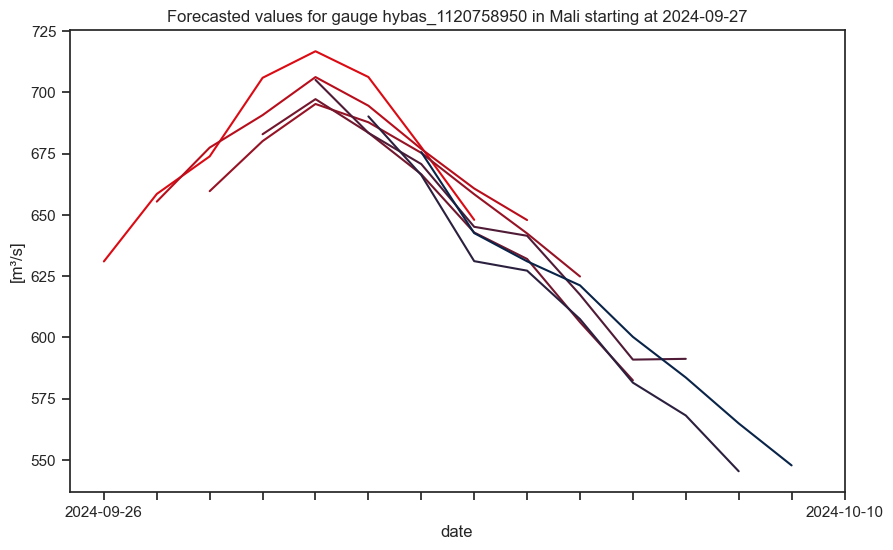

In [67]:
plot_week_of_gauge_forecast_for_issue_time(
    df_forecasts_Mali, df_gauges_Mali['gaugeId'].tolist()[0], start_date, 'Mali'
)

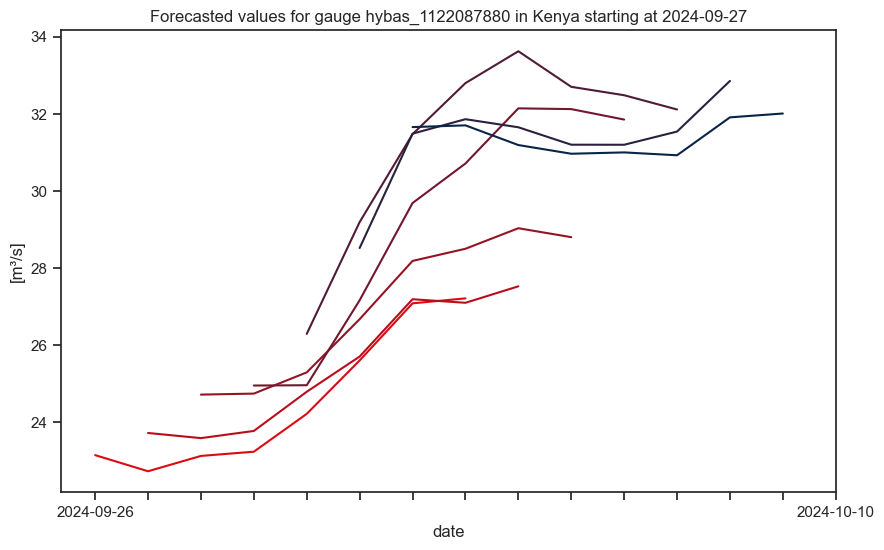

In [68]:
plot_week_of_gauge_forecast_for_issue_time(
    df_forecasts_Kenya, df_gauges_Kenya['gaugeId'].tolist()[0], start_date, 'Kenya'
)

In [89]:
# def set_TeX_style() -> None:
#     """
#     Sets the style environment for the plots to use TeX for text rendering
#     """
#     plt.rcParams.update({
#         "text.usetex": True,
#         "font.family": "Computer Modern Serif",
#         "axes.labelsize": 10,     # fontsize for x and y labels
#         "xtick.labelsize": 10,    # fontsize of the tick labels
#         "ytick.labelsize": 10,    # fontsize of the tick labels
#         "legend.fontsize": 10,    # fontsize of the legen
#     })
    

# def plot_x_days_of_gauge_forecast_for_issue_time(
#         df : pd.DataFrame,
#         gauge: str,
#         issue_date : datetime.datetime,
#         days: int,
#         country : str = None,
#         TeX: bool = False,
#         export: bool = False) -> None:
#     """
#     Plots the forecasted values for a specific gauge over a month of
#     issue times, giving 30 graphs in total, each of (7 + 1 =) 8 days length 

#     :param df: DataFrame with forecasted values
#     :param gauge: ID of the gauge
#     :param issue_time: first issue time
#     :param country: Name of the country
#     """
#     set_plot_style()
#     set_TeX_style() if TeX else None
#     plt.figure(figsize = (10, 6))
#     custom_palette = get_custom_palette(days)
    
#     for idx in range(days):
#         df_subset = make_subset_for_gauge_and_issue_time(
#             df, gauge, issue_date + datetime.timedelta(days = idx)
#         )
#         if df_subset.empty:
#             print(f"No forecasted values for gauge {gauge} at {issue_date.date()}")
#             return

#         sns.lineplot(
#             x = 'fc_date',
#             y = 'fc_value',
#             data = df_subset,
#             color = custom_palette[idx]
#         )

#     set_custom_date_ticks(
#         plt.gca(),
#         create_dates_series(issue_date, days + 7) # a week plus lead time
#     )

#     plt.title(f'Forecasts for gauge {gauge} in {country}, w/ 1st issue date: {issue_date.date()}')
#     plt.xlabel('date')
#     plt.ylabel('[m³/s]')
#     plt.draw()

#     if export:
#         plt.savefig(f"../../plots/graph_{days}_fcs_of_gauge_{gauge}_at_issue_date_{str(issue_date.date())}.pdf",
#                     format = 'pdf',
#                     bbox_inches = 'tight',
#                     pad_inches = 0.015)
        
#     plt.show()

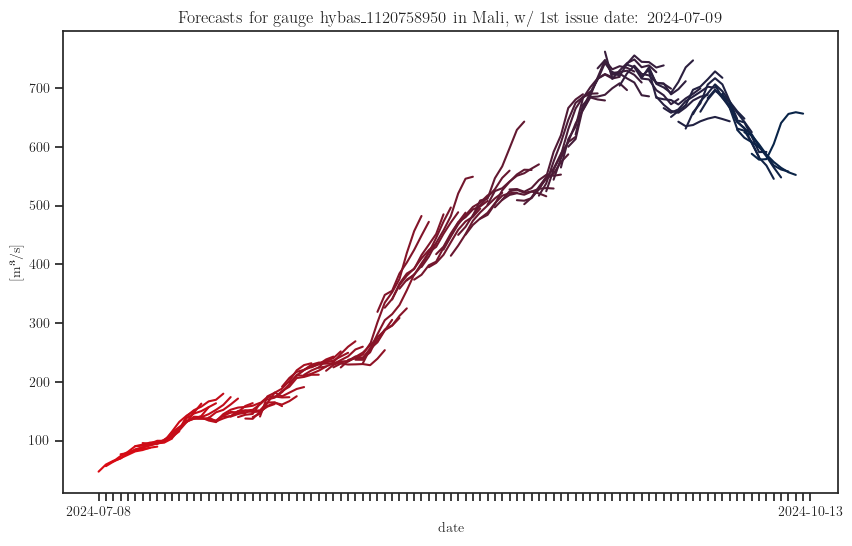

In [90]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 90)
plot_x_days_of_gauge_forecast_for_issue_time(
    df_forecasts_Mali, df_gauges_Mali['gaugeId'].tolist()[0], start_date, 90, 'Mali', True, True
)

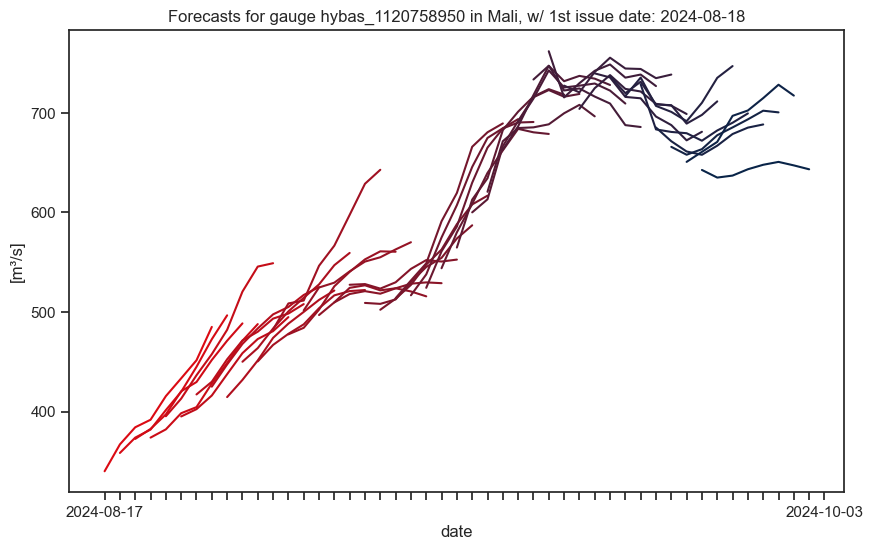

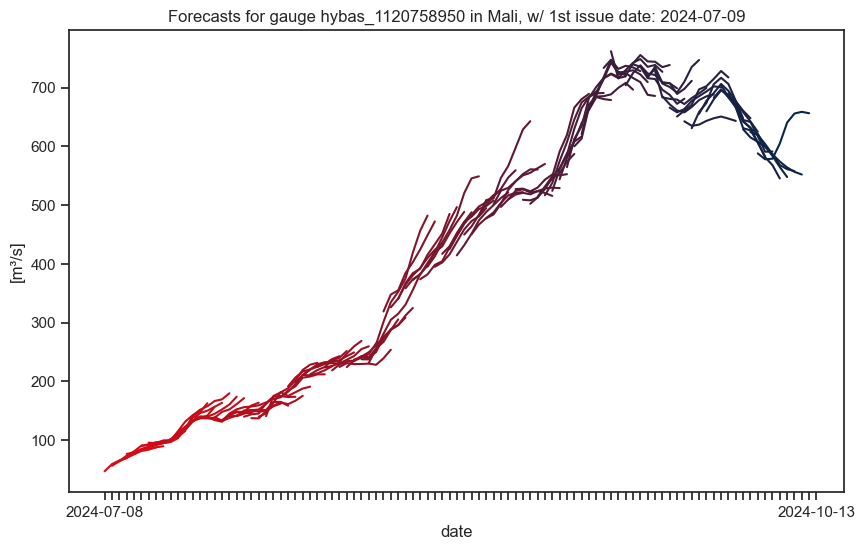

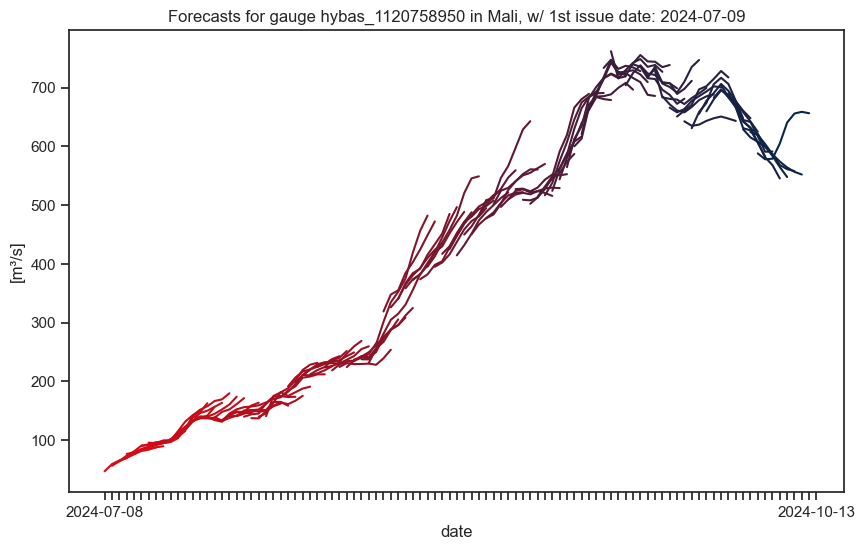

In [77]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 50)
plot_x_days_of_gauge_forecast_for_issue_time(
    df_forecasts_Mali, df_gauges_Mali['gaugeId'].tolist()[0], start_date, 40, 'Mali'
)

start_date = datetime.datetime.now() - datetime.timedelta(days = 90)
plot_x_days_of_gauge_forecast_for_issue_time(
    df_forecasts_Mali, df_gauges_Mali['gaugeId'].tolist()[0], start_date, 90, 'Mali'
)